In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv(url, names=cols)

In [3]:
# Features and Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Decision Tree
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [6]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Accuracy
print("Decision Tree - Train:", dt_clf.score(X_train, y_train))
print("Decision Tree - Test:", dt_clf.score(X_test, y_test))
print("Random Forest - Train:", rf_clf.score(X_train, y_train))
print("Random Forest - Test:", rf_clf.score(X_test, y_test))

Decision Tree - Train: 0.7752442996742671
Decision Tree - Test: 0.7662337662337663
Random Forest - Train: 1.0
Random Forest - Test: 0.7207792207792207


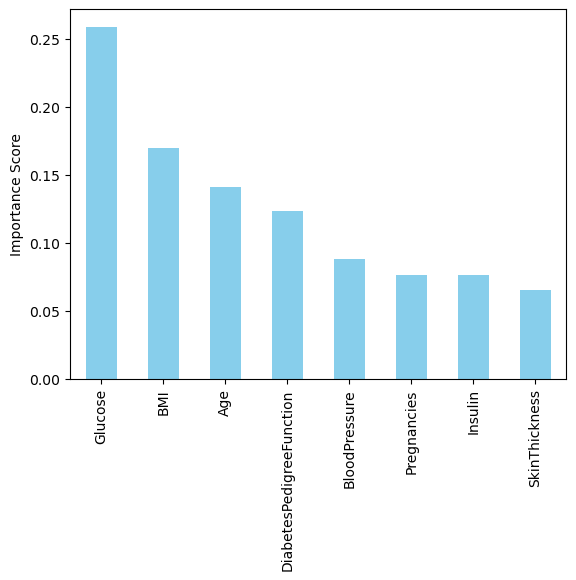

In [8]:
# Feature Importance
importances = rf_clf.feature_importances_
pd.Series(importances, index=X.columns).sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.ylabel("Importance Score")
plt.show()